# A new approach for EEG feature extraction in P300-based lie detection

<p style="color:rgb(47,79,79);font-size:1.9vh;"> <i>Vahid Abootalebi</i><sup>a,b,d</sup>| <i>Mohammad Hassan Moradi</i> <sup>b</sup>| <i>Mohammad Ali Khalilzadeh</i> <sup>c,d</sup></p>


<sup>a</sup> Electrical Engineering Department, Yazd University, Yazd, Iran
<br>
<sup>b</sup> Biomedical Engineering Faculty, Amirkabir University of Technology, Tehran, Iran
<br>
<sup>c</sup> Islamic Azad University, Mashhad Branch, Iran
<br>
<sup>c</sup> Research Center of Intelligent Signal Processing, Tehran, Iran

![alt text](img/logo.svg "Logo")

https://doi.org/10.1016/j.cmpb.2008.10.001

## Abstract
P300-based Guilty Knowledge Test (GKT) has been suggested as an alternative approach for conventional polygraphy.

The purpose of this study was to extend a previously introduced pattern recognition method for the ERP assessment
in this application. This extension was done by the further extending the feature set and also employing
a method for the selection of optimal features.

For the evaluation of the method, several subjects went
through the designed "Guilty Knowledge Test" paradigm and their respective brain signals were recorded. Next, a P300 detection
approach based on some features and a statistical classifier was implemented.
The optimal feature set was
selected using a genetic algorithm from a primary feature set including some morphological, frequency and
wavelet features and was used for the classification of the data. The rates of correct detection in guilty
and innocent subjects were 86%, which was better than other previously used methods.

## Feature Extraction

The following features were described by the original paper, but they were not implemented. I offer an implementation of them in Python, as well as mathematical definitions for each.

#### Morphological Features
###### Latency (LAT, $t_{S_{max}}$)
the ERP’s latency time, i.e. the time
where the maximum signal value appears:

$ t_{S_{max}} = {t|s(t) = s_{max}} $


###### Amplitude (AMP, $S_{max}$)
—the maximum signal value:

$ s_{max} = max\{s(t)\} $

###### Latency/Amplitude ratio (LAR, $t_{S_{max}}/S_{max}$)


###### Absolute amplitude (AAMP, |$S_{max}$|)



###### Absolute latency/amplitude ratio (ALAR, |$t_{s_{max}}/s_{max}$|)

###### Positive area (PAR, $A_{p}$)
The sum of positive signal values:

$  A_{p} = \sum_{t=400ms}^{800ms} 0.5(s(t) + |s(t)|) $
###### Negative area
The sum of negative signal values:

$  A_{p} = \sum_{t=400ms}^{800ms} 0.5(s(t) - |s(t)|) $
###### Total area (TAR, $A_{pn}$)
$A_{pn} = A_{p} + A_{n}$
###### Total absolute area (TAAR, $A_{p|n|}$)
 $A_{pn} = A_{p} + |A_{n}|$
###### Average absolute signal slope (AASS, $\dot{s}$)
$   \dot{s}  = \frac{1}{n} \sum_{t=400ms}^{800ms-r} \frac{1}{\tau}(s(t+\tau) - |s(t)|) $

Where the $\tau$ is the sampling interval of the signal, n the number of samples of the digital signal, and s(t) the signal value of the tth sample.
###### Peak-to-peak (PP, pp)
$pp = s_{max} - s_{min}$
Where s_{max} and s_{min} are the maximum and the minimum signal values, respectively.
###### Peak-to-peak time window (PPT, $t_{pp}$)
$t_{pp} = t_{s_{max}} - t_{s_{min}}$
###### Peak-to peak slope (PPS, $\dot{s}_{pp}$)
$\dot{s}_{pp} = \frac{pp}{t_{pp}}$
###### Zero crossings (ZC, $n_{ZC}$)
the number of times t that s(t)=0, in peak-to-peak time window:

$ n_{ZC} = \sum_{t=t_{s_{min}}}^{t_{s_{max}}} \delta_{s} $

where \delta_{s} = 1 if s(t)=0, 0 otherwise


###### Zero crossings density (ZCD, d_{zc})
Zero crossings per time unit, in peak-to-peak time window:

$ d_{ZC} = \frac{n_{ZC}}{t_{pp}} $

where n_{ZC} are the zero crossings and t_{pp} is the peak-to-peak time window.

In [1]:

from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import numpy as np

def signal_slope_f(row):
    total = 0.0
    for idx, val in enumerate(row[:-1]):
        total += np.abs(row[idx+1] - val)
    total /= len(row)
    return total

def latency(row):
    return row.argmax()

def positive_area(row):
    return row[row>0].sum()

def negative_area(row):
    return row[row<0].sum()

def zero_crossing(row):
    return np.where(np.diff(np.sign(row[row.argmin():row.argmax()])))[0].size


#### Frequency features

###### Mode frequency:

$f_{mode}$ is the frequency with the most energy content in the
signal spectrum, so the maximum amplitude in the power
spectrum density of the signal is at this frequency:

$S(f_{mode}) = Max_f\{S(f)\}$
S is the power spectral density of signal and f is frequency.

###### Median frequency:
Median frequency ($f_{median}$) separates the power spectrum
into two equal energy areas and is calculated from the
following equation:

$$ \int_{0}^{f{median}} S(f) df = \int_{f{median}}^{\infty} S(f) df $$


In [3]:
import pandas as pd
from scipy import signal
from numpy import trapz


def mode_freq_f(row):
    test_signal = pd.to_numeric(row)
    freqs, psd = signal.welch(test_signal.values, fs = 250)
    return 10**(freqs[np.argmax(psd)])


def median_freq_f(row):
    test_signal = pd.to_numeric(row)
    freqs, psd = signal.welch(test_signal.values, fs = 250)
    total_area = trapz(psd,freqs)
    half_area = total_area/2
    integral_values = np.array([abs(trapz(psd[:i],freqs[:i]) - half_area) for i in range(len(freqs))])
    return freqs[np.argmin(integral_values)]

## Learn more


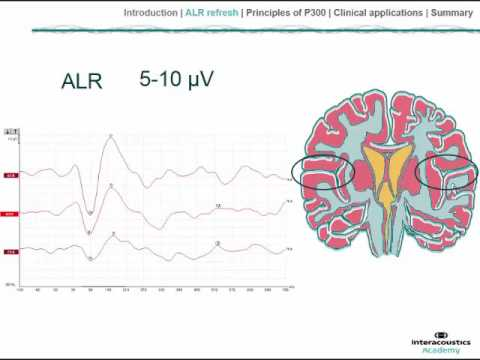

In [4]:
from IPython.display import YouTubeVideo

YouTubeVideo('N2H4NTAZrhY', width=800, height=600)

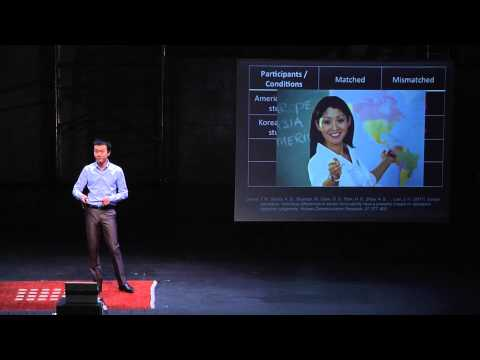

In [5]:
YouTubeVideo('nZEFgC0oHpA', width=800, height=600)

## Втор колоквиум промени Script of Scripts

In [23]:
y <- rnorm(1000)

In [24]:
y

[1]  0.070522956 -0.908439701  0.234145097  0.053032798  0.929925830
   [6] -0.193055115  2.321133841  0.992236812  0.234929714  1.421962737
  [11] -0.452472286  0.529370380 -1.164611857 -1.994023098 -0.074775918
  [16] -0.953703683  1.596065463 -0.782060141  1.624214250  0.674220544
  [21]  2.008694724  0.061319399 -0.477576873 -1.784962526  0.210804536
  [26] -0.053448949  1.469243994  0.276683640 -0.701063478 -1.172560543
  [31] -0.682154437 -0.849524580 -0.720390058 -1.067809645  0.994395770
  [36]  0.166748200 -0.677928852 -1.765732379  0.112343949  1.456887303
  [41]  1.088458970  1.007594845  0.695793180  1.337055170 -0.632962016
  [46] -0.341894133  0.771491357  1.047522436 -0.748112924 -0.794155287
  [51]  1.082060469  1.406950430  0.935822530 -1.078016244  2.824133538
  [56] -0.157937740 -1.240365379  2.354095932 -0.095704932  1.176129487
  [61] -0.979990393  0.607873409  0.832143009 -0.943912087 -0.596622678
  [66] -2.103066409 -0.573572810 -1.260325986  0.671128419  0.766230837
  [71]  1.140139975 -0.094022087  0.393686552 -0.419083907 -1.407138001
  [76] -0.188478512  0.979335424  0.647473075  1.446410915  0.517409497
  [81]  0.108669777 -1.487643411  1.037111056  0.251334204 -0.442557449
  [86]  0.108581448 -1.139688881 -1.203959057  0.250379468 -0.415432894
  [91]  1.361412067  0.545383781  1.206855774  0.691814157  0.132149014
  [96]  0.784794245  0.283131342 -1.037523429 -1.941774155  1.050957077
 [101]  0.604109828 -0.371969777 -0.875117206 -0.778362014 -1.452743481
 [106] -1.231509620  0.534849640  2.457737670 -0.981020746 -0.606830052
 [111] -0.412970207  1.211806422 -0.285424330 -1.108629147 -0.751369069
 [116]  0.403981958  1.338053436 -0.080232625 -0.108562255  0.014871825
 [121] -0.237613058 -0.926383220 -0.158945447 -0.111922157  1.416173220
 [126]  0.719502568 -0.282003324 -0.320816321  0.822068368 -0.013531758
 [131]  0.627965108  0.400887949 -0.561346804 -2.425660621  0.590091279
 [136]  0.159425019  0.832625714 -1.522527478  0.182029207  0.653702099
 [141] -2.083099417  0.141188475 -0.784018162 -0.977319876 -0.387697324
 [146] -0.110176020  0.479797778 -0.433706803  0.385131839 -0.341511772
 [151] -0.704392659 -0.068524671  0.841316079 -0.388235580 -0.419728379
 [156] -0.769240777  0.072149327 -2.608961726  1.000369914  1.308329438
 [161]  1.482289714 -0.156633371  1.318397552  0.432881179 -0.944510572
 [166] -2.153821592  0.001441679  1.267040091 -1.076583325 -0.316657824
 [171]  0.933641469 -1.408047932 -0.443857196 -0.070090861 -0.955618416
 [176]  0.299572277 -0.460858998  2.168260617 -0.411310812  0.508362493
 [181]  0.254093088  0.919362113 -0.607697167  0.192320123  1.954892314
 [186] -0.229212974 -1.248353134 -0.073187209 -0.565050277 -0.380624602
 [191] -1.275064486  1.750403878  0.013738726 -1.341770643  1.790132357
 [196] -1.378696485 -0.016473028  0.995730313  0.835811743 -0.599358757
 [201]  0.936011234  0.771651183 -0.523343542  0.979539745 -0.382107229
 [206] -0.731548694  0.112991555  1.483057312  0.185469235 -0.801403837
 [211]  0.138455128  0.584898068 -0.520173076 -0.405249596  0.935728472
 [216]  0.524800874  0.082034939 -0.955975082  0.397371587  0.781021787
 [221] -1.640743622 -0.773994868 -1.424788149 -0.240541018  2.153729143
 [226]  0.963056918 -1.731863705 -0.001181345  0.335435333  1.309613469
 [231] -0.368233927  0.499745210 -0.042484351 -0.721549535  0.405921855
 [236]  1.214542901  0.200630019  0.503432845  1.571548249  2.775774565
 [241] -0.779313080  0.641766072  2.222647048 -0.654348262 -1.136676081
 [246]  0.021617089 -0.153614292  2.955683778  0.414144967 -0.405456175
 [251] -0.524337412  1.359404710  2.360402642  0.605643419  0.360783673
 [256]  0.415082670  1.309256720  0.285162446  1.052819265 -0.112287464
 [261] -0.571367537 -0.646350350  0.457957047  0.684396077 -0.350475719
 [266]  0.138754055 -0.017047571 -1.486099647  0.009670500  2.463781916
 [271] -3.346645650 -0.520025841  2.225983538  1.191825974  0.437816124
 [276]  0.593638449  0.929845798 -1.1019356

In [25]:
%get y --from R

In [27]:
import scipy
import plotly.figure_factory as ff
import numpy as np


x = np.random.randn(200) - 1

hist_data = [x, y]

group_labels = ['Python randn numbers', 'R rnorm numbers']
colors = ['#333F44', '#37AA9C']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)

# Add title
fig.update_layout(title_text='Curve and Rug Plot')
fig.show()